In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diamonds = pd.read_csv("diamonds.csv")
#diamonds = pd.read_csv("/content/drive/MyDrive/~Data Science/~~~Capstone/Task02/diamonds.csv")

In [4]:
diamonds.head(5)
#from IPython import display
#display(diamonds.head())
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

#diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamonds.mean()

Unnamed: 0    26970.500000
carat             0.797940
depth            61.749405
table            57.457184
price          3932.799722
x                 5.731157
y                 5.734526
z                 3.538734
dtype: float64

In [5]:
#unnamed:0 needs to be dropped

diamonds = diamonds.drop(["Unnamed: 0"], axis = 1)

In [191]:
Total = diamonds['carat'].sum()
print (Total)

43031.23


In [7]:
#Renaming columns for clarity
#depth is depth percentage
#x,y, and z need to be changed
#x is length, y is width, z is depth
diamonds = diamonds.rename(columns = 
                           {"depth":"depthper", "x":"length", "y":"width", "z":"depth"})

In [8]:
diamonds.head(5)

,carat,cut,color,clarity,depthper,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
diamonds.dtypes

carat       float64
cut          object
color        object
clarity      object
depthper    float64
table       float64
price         int64
length      float64
width       float64
depth       float64
dtype: object

In [10]:
#check for missing values 
diamonds.isnull().any()

carat       False
cut         False
color       False
clarity     False
depthper    False
table       False
price       False
length      False
width       False
depth       False
dtype: bool

### There are no missing values in any variable

##### check the uniques for the ordinal variables

In [11]:
diamonds.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [12]:
diamonds.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [13]:
diamonds.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

### check for outliers

In [14]:
#are there any crazy outliers or numbers that don't make sense?
diamonds.describe()

,carat,depthper,table,price,length,width,depth
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [192]:
bl = 53940 * .797940
print(bl)

43040.8836


### The min for length, width, and depth is 0...

In [15]:
#of course this doesn't make sense.
# this brings up all of the rows with 0 in any of those three places
diamonds.loc[(diamonds['length']==0) | (diamonds['width']==0) | (diamonds['depth']==0)]

,carat,cut,color,clarity,depthper,table,price,length,width,depth
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [16]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat       53940 non-null float64
cut         53940 non-null object
color       53940 non-null object
clarity     53940 non-null object
depthper    53940 non-null float64
table       53940 non-null float64
price       53940 non-null int64
length      53940 non-null float64
width       53940 non-null float64
depth       53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [17]:
#replacing missing depth with formula for depth
diamonds["depth"] = np.where(diamonds["depth"] == 0.0, 
                             (((diamonds["length"] + diamonds["width"])/2)*diamonds["depthper"]),
                             diamonds["depth"])

In [18]:
#seeing all columns with 0
diamonds.loc[(diamonds['length']==0) | (diamonds['width']==0) | (diamonds['depth']==0)]

,carat,cut,color,clarity,depthper,table,price,length,width,depth
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,203.896
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.000
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.000
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.000
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.000
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.000
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.000
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.000


In [19]:
#you can see that the number of columns with 0's reduced from 20 to 8. 
#Row 11182 has very high depth, because the length is zero. 
#That messed with the formula (depth = avg width and length times depth %)
#Therefore we will now delete all rows with a 0 in LENGTH.

In [20]:
#Deleting rows where length is 0
diamonds = diamonds[diamonds.length != 0]

In [21]:
diamonds.loc[(diamonds['length']==0) | (diamonds['width']==0) | (diamonds['depth']==0)]

,carat,cut,color,clarity,depthper,table,price,length,width,depth


In [22]:
diamonds.describe()

,carat,depthper,table,price,length,width,depth
count,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000
mean,0.797879,61.749336,57.457029,3932.136079,5.732007,5.735254,3.639935
std,0.473986,1.432514,2.234064,3988.734835,1.119670,1.140343,6.795973
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,566.225000


## Univariate analysis

### Price

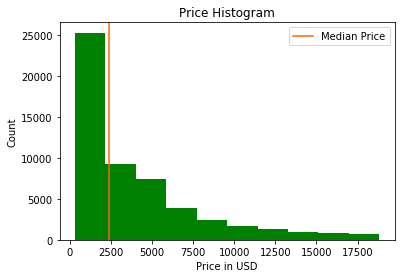

In [23]:
plt.hist(diamonds['price'], color = 'g', bins=10)
plt.axvline((np.quantile(diamonds['price'], .5)),color='#ff6500',label='Median Price')
plt.legend()
plt.xlabel('Price in USD')
plt.ylabel('Count')
plt.title('Price Histogram')
plt.show()

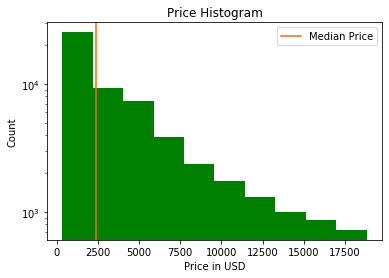

In [24]:
plt.hist(diamonds['price'], color = 'g', log=True)

plt.axvline((np.quantile(diamonds['price'], .5)),color='#ff6500',label='Median Price')
plt.legend()
plt.xlabel('Price in USD')
plt.ylabel('Count')
plt.title('Price Histogram')
plt.show()

Text(0.5, 1.0, 'Price Boxplot')

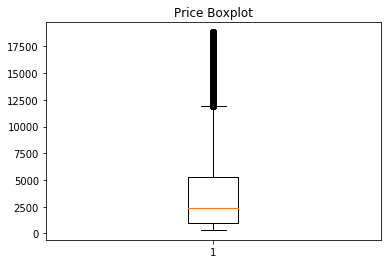

In [25]:
plt.boxplot(diamonds['price'])
plt.title('Price Boxplot')

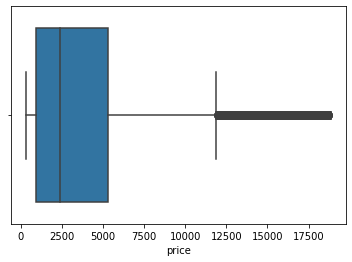

In [26]:
sns.boxplot(diamonds['price'])

In [27]:
diamonds.price.describe()

count    53932.000000
mean      3932.136079
std       3988.734835
min        326.000000
25%        949.750000
50%       2401.000000
75%       5324.000000
max      18823.000000
Name: price, dtype: float64

In [28]:
iqr = (np.quantile(diamonds['price'], .75)) - (np.quantile(diamonds['price'], .25))
iqr

4374.25

In [29]:
out_limit = 1.5*iqr
out_limit

6561.375

In [30]:
lower_limit = ((np.quantile(diamonds['price'], .25)) - 1.5*iqr)
upper_limit = ((np.quantile(diamonds['price'], .75)) + 1.5*iqr)

In [31]:
print(lower_limit)
print(upper_limit)

-5611.625
11885.375


In [32]:
#This is the number of outliers
diamonds[diamonds.price > upper_limit].shape[0]

3537

In [33]:
#gives the percentage of rows that are outliers
out = (diamonds[diamonds.price > upper_limit].shape[0]) / (diamonds.shape[0])
out

0.06558258547800934

In [34]:
#normality tests
#first is Shapiro-Wilk
from scipy.stats import shapiro
#normality test
stat, p = shapiro(diamonds['price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
#shapiro may not be good to use cause N > 5000

Statistics=0.798, p=0.000
Sample does not look Gaussian (reject H0)


/Users/Frank/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [35]:
# D'Agostino and Pearson's Test
from scipy.stats import normaltest
stat, p = normaltest(diamonds['price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=15096.378, p=0.000
Sample does not look Gaussian (reject H0)


In [36]:
#anderson-darling
from scipy.stats import anderson
result = anderson(diamonds['price'])
print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):

    sl, cv = result.significance_level[i], result.critical_values[i]

    if result.statistic < result.critical_values[i]:

        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv)) 
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 3473.378
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


## Carat

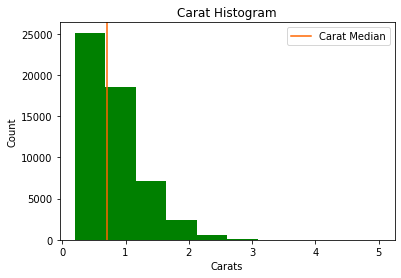

In [37]:
plt.hist(diamonds['carat'], color = 'g')
plt.axvline((np.quantile(diamonds['carat'], .5)),color='#ff6500',label='Carat Median')
plt.legend()
plt.xlabel('Carats')
plt.ylabel('Count')
plt.title('Carat Histogram')
plt.show()

In [38]:
#plt.hist(diamonds['carat'], color = 'g', log=True)
#plt.xlabel('Carats')
#plt.ylabel('Count')
#plt.title('Carats Histogram')
#plt.show()

In [39]:
diamonds.carat.describe()

count    53932.000000
mean         0.797879
std          0.473986
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

In [40]:
(diamonds.carat.mean() - diamonds.carat.median())/diamonds.carat.median()

0.13982766658541226

Text(0.5, 1.0, 'Carat Boxplot')

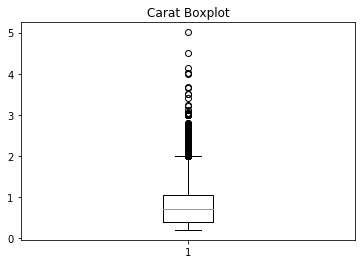

In [41]:
plt.boxplot(diamonds['carat'])
plt.title('Carat Boxplot')

In [42]:
carat_iqr = (np.quantile(diamonds['carat'], .75)) - (np.quantile(diamonds['carat'], .25))
carat_lower_limit = ((np.quantile(diamonds['carat'], .25)) - 1.5*carat_iqr)
carat_upper_limit = ((np.quantile(diamonds['carat'], .75)) + 1.5*carat_iqr)
print(carat_iqr)
print(carat_lower_limit)
print(carat_upper_limit)

0.64
-0.5599999999999999
2.0


In [43]:
#This is the number of outliers
diamonds[diamonds.carat > carat_upper_limit].shape[0]

1888

In [44]:
#gives the percentage of rows that are outliers
carat_out = (diamonds[diamonds.carat > carat_upper_limit].shape[0]) / (diamonds.shape[0])
carat_out

0.03500704590966402

In [45]:
# D'Agostino and Pearson's Test
from scipy.stats import normaltest
stat, p = normaltest(diamonds['carat'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=8926.833, p=0.000
Sample does not look Gaussian (reject H0)


In [46]:
#anderson-darling
from scipy.stats import anderson
result = anderson(diamonds['carat'])
print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):

    sl, cv = result.significance_level[i], result.critical_values[i]

    if result.statistic < result.critical_values[i]:

        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv)) 
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 1529.202
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


## Length

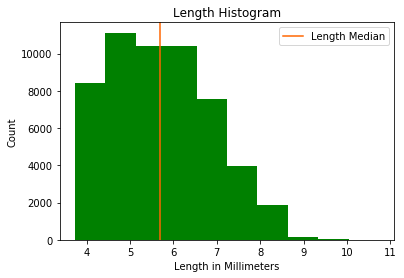

In [47]:
plt.hist(diamonds['length'], color = 'g',)
plt.axvline((np.quantile(diamonds['length'], .5)),color='#ff6500',label='Length Median')
plt.legend()
plt.xlabel('Length in Millimeters')
plt.ylabel('Count')
plt.title('Length Histogram')
plt.show()

In [48]:
diamonds.length.describe()

count    53932.000000
mean         5.732007
std          1.119670
min          3.730000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: length, dtype: float64

Text(0.5, 1.0, 'Length Boxplot')

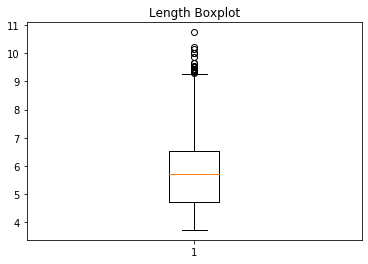

In [49]:
plt.boxplot(diamonds['length'])
plt.title('Length Boxplot')

In [50]:
length_iqr = (np.quantile(diamonds['length'], .75)) - (np.quantile(diamonds['length'], .25))
length_lower_limit = ((np.quantile(diamonds['length'], .25)) - 1.5*length_iqr)
length_upper_limit = ((np.quantile(diamonds['length'], .75)) + 1.5*length_iqr)
print(length_iqr)
print(length_lower_limit)
print(length_upper_limit)

1.83
1.9649999999999999
9.285


In [51]:
#This is the number of outliers
diamonds[diamonds.length > length_upper_limit].shape[0]

24

In [52]:
#gives the percentage of rows that are outliers
length_out = (diamonds[diamonds.length > length_upper_limit].shape[0]) / (diamonds.shape[0])
length_out

0.0004450048208855596

In [53]:
# D'Agostino and Pearson's Test
from scipy.stats import normaltest
stat, p = normaltest(diamonds['length'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=4218.593, p=0.000
Sample does not look Gaussian (reject H0)


In [54]:
#anderson-darling
from scipy.stats import anderson
result = anderson(diamonds['length'])
print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):

    sl, cv = result.significance_level[i], result.critical_values[i]

    if result.statistic < result.critical_values[i]:

        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv)) 
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 688.276
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


## Width

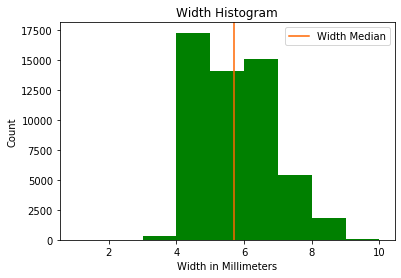

In [55]:
plt.hist(diamonds['width'], color = 'g', bins=[1,2,3,4,5,6,7,8,9,10])#, log=True)
plt.axvline((np.quantile(diamonds['length'], .5)),color='#ff6500',label='Width Median')
plt.legend()
plt.xlabel('Width in Millimeters')
plt.ylabel('Count')
plt.title('Width Histogram')
plt.show()

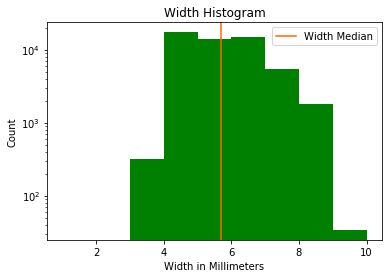

In [56]:
plt.hist(diamonds['width'], color = 'g', bins=[1,2,3,4,5,6,7,8,9,10], log=True)
plt.axvline((np.quantile(diamonds['length'], .5)),color='#ff6500',label='Width Median')
plt.legend()
plt.xlabel('Width in Millimeters')
plt.ylabel('Count')
plt.title('Width Histogram')
plt.show()

Text(0.5, 1.0, 'Width Boxplot')

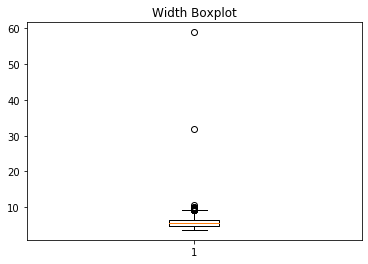

In [57]:
plt.boxplot(diamonds['width'])
plt.title('Width Boxplot')

In [58]:
diamonds.width.describe()

count    53932.000000
mean         5.735254
std          1.140343
min          3.680000
25%          4.720000
50%          5.710000
75%          6.540000
max         58.900000
Name: width, dtype: float64

In [59]:
width_iqr = (np.quantile(diamonds['width'], .75)) - (np.quantile(diamonds['width'], .25))
width_lower_limit = ((np.quantile(diamonds['width'], .25)) - 1.5*width_iqr)
width_upper_limit = ((np.quantile(diamonds['width'], .75)) + 1.5*width_iqr)
print(width_iqr)
print(width_lower_limit)
print(width_upper_limit)

1.8200000000000003
1.9899999999999993
9.27


In [60]:
#This is the number of outliers
diamonds[diamonds.width > width_upper_limit].shape[0]

22

In [61]:
#gives the percentage of rows that are outliers
width_out = (diamonds[diamonds.width > width_upper_limit].shape[0]) / (diamonds.shape[0])
width_out

0.00040792108581176297

In [62]:
# D'Agostino and Pearson's Test
from scipy.stats import normaltest
stat, p = normaltest(diamonds['width'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=40558.046, p=0.000
Sample does not look Gaussian (reject H0)


In [63]:
#anderson-darling
from scipy.stats import anderson
result = anderson(diamonds['width'])
print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):

    sl, cv = result.significance_level[i], result.critical_values[i]

    if result.statistic < result.critical_values[i]:

        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv)) 
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 631.184
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


## Depth

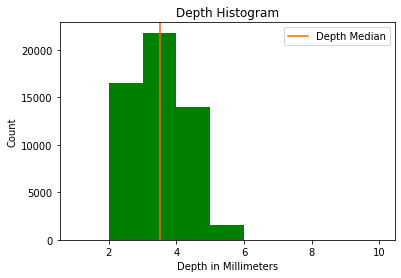

In [64]:
plt.hist(diamonds['depth'], color = 'g',bins=[1,2,3,4,5,6,7,8,9,10])#, log=True)
plt.axvline((np.quantile(diamonds['depth'], .5)),color='#ff6500',label='Depth Median')
plt.legend()
plt.xlabel('Depth in Millimeters')
plt.ylabel('Count')
plt.title('Depth Histogram')
plt.show()

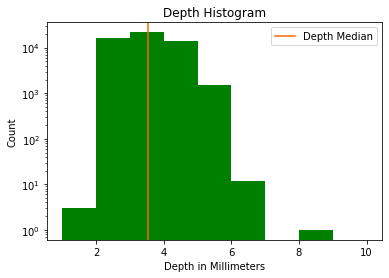

In [65]:
plt.hist(diamonds['depth'], color = 'g',bins=[1,2,3,4,5,6,7,8,9,10], log=True)
plt.axvline((np.quantile(diamonds['depth'], .5)),color='#ff6500',label='Depth Median')
plt.legend()
plt.xlabel('Depth in Millimeters')
plt.ylabel('Count')
plt.title('Depth Histogram')
plt.show()

Text(0.5, 1.0, 'Depth Boxplot')

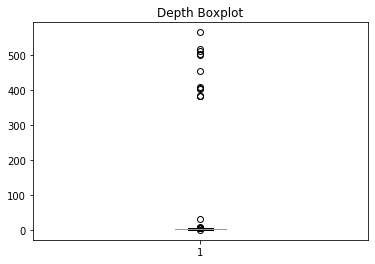

In [66]:
plt.boxplot(diamonds['depth'])
plt.title('Depth Boxplot')

In [67]:
diamonds.depth.describe()

count    53932.000000
mean         3.639935
std          6.795973
min          1.070000
25%          2.910000
50%          3.530000
75%          4.040000
max        566.225000
Name: depth, dtype: float64

In [68]:
depth_iqr = (np.quantile(diamonds['depth'], .75)) - (np.quantile(diamonds['depth'], .25))
depth_lower_limit = ((np.quantile(diamonds['depth'], .25)) - 1.5*depth_iqr)
depth_upper_limit = ((np.quantile(diamonds['depth'], .75)) + 1.5*depth_iqr)
print(depth_iqr)
print(depth_lower_limit)
print(depth_upper_limit)

1.13
1.2150000000000003
5.734999999999999


In [69]:
#This is the number of outliers
diamonds[diamonds.depth > depth_upper_limit].shape[0]

40

In [70]:
#gives the percentage of rows that are outliers
depth_out = (diamonds[diamonds.depth > depth_upper_limit].shape[0]) / (diamonds.shape[0])
depth_out

0.0007416747014759327

In [71]:
# D'Agostino and Pearson's Test
from scipy.stats import normaltest
stat, p = normaltest(diamonds['depth'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=188200.674, p=0.000
Sample does not look Gaussian (reject H0)


In [72]:
#anderson-darling
from scipy.stats import anderson
result = anderson(diamonds['depth'])
print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):

    sl, cv = result.significance_level[i], result.critical_values[i]

    if result.statistic < result.critical_values[i]:

        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv)) 
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 16197.803
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


## Depth Percentage

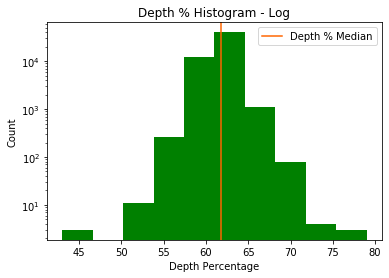

In [73]:
plt.hist(diamonds['depthper'], color = 'g', log=True)
plt.axvline((np.quantile(diamonds['depthper'], .5)),color='#ff6500',label='Depth % Median')
plt.legend()
plt.xlabel('Depth Percentage')
plt.ylabel('Count')
plt.title('Depth % Histogram - Log')
plt.show()

Text(0.5, 1.0, 'Depth % Boxplot')

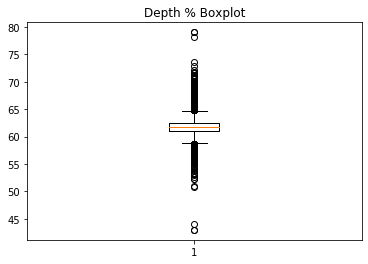

In [74]:
plt.boxplot(diamonds['depthper'])
plt.title('Depth % Boxplot')

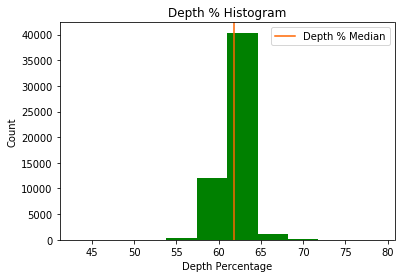

In [75]:
plt.hist(diamonds['depthper'], color = 'g', log=False)
plt.axvline((np.quantile(diamonds['depthper'], .5)),color='#ff6500',label='Depth % Median')
plt.legend()
plt.xlabel('Depth Percentage')
plt.ylabel('Count')
plt.title('Depth % Histogram')
plt.show()

In [76]:
diamonds.depthper.describe()

count    53932.000000
mean        61.749336
std          1.432514
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depthper, dtype: float64

In [77]:
depthper_iqr = (np.quantile(diamonds['depthper'], .75)) - (np.quantile(diamonds['depthper'], .25))
depthper_lower_limit = ((np.quantile(diamonds['depthper'], .25)) - 1.5*depthper_iqr)
depthper_upper_limit = ((np.quantile(diamonds['depthper'], .75)) + 1.5*depthper_iqr)
print(depthper_iqr)
print(depthper_lower_limit)
print(depthper_upper_limit)

1.5
58.75
64.75


In [78]:
#This is the number of outliers
depthper_above_upper_limit = diamonds[diamonds.depthper > depthper_upper_limit].shape[0]
depthper_below_lower_limit = diamonds[diamonds.depthper < depthper_lower_limit].shape[0]
total_depthper_outliers = depthper_above_upper_limit + depthper_below_lower_limit
print(depthper_above_upper_limit)
print(depthper_below_lower_limit)
print(total_depthper_outliers)

1039
1505
2544


In [79]:
#gives the percentage of rows that are outliers
depthper_upper_outliers_percent = (diamonds[diamonds.depthper > depthper_upper_limit].shape[0]) / (diamonds.shape[0])
print(depthper_upper_outliers_percent)
depthper_lower_outliers_percent = (diamonds[diamonds.depthper < depthper_lower_limit].shape[0]) / (diamonds.shape[0])
print(depthper_lower_outliers_percent)
total_depthper_outliers_percent = depthper_upper_outliers_percent + depthper_lower_outliers_percent
print(total_depthper_outliers_percent)

0.01926500037083735
0.027905510643031966
0.04717051101386932


In [80]:
# D'Agostino and Pearson's Test
from scipy.stats import normaltest
stat, p = normaltest(diamonds['depthper'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=6613.925, p=0.000
Sample does not look Gaussian (reject H0)


In [81]:
#anderson-darling
from scipy.stats import anderson
result = anderson(diamonds['depthper'])
print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):

    sl, cv = result.significance_level[i], result.critical_values[i]

    if result.statistic < result.critical_values[i]:

        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv)) 
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 502.669
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


## Table

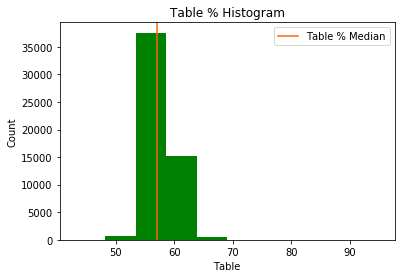

In [82]:
plt.hist(diamonds['table'], color = 'g', log=False)
plt.axvline((np.quantile(diamonds['table'], .5)),color='#ff6500',label='Table % Median')
plt.legend()
plt.xlabel('Table')
plt.ylabel('Count')
plt.title('Table % Histogram')
plt.show()

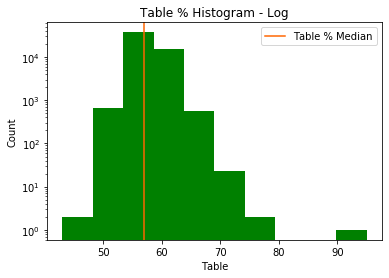

In [83]:
plt.hist(diamonds['table'], color = 'g', log=True)
plt.axvline((np.quantile(diamonds['table'], .5)),color='#ff6500',label='Table % Median')
plt.legend()
plt.xlabel('Table')
plt.ylabel('Count')
plt.title('Table % Histogram - Log')
plt.show()

Text(0.5, 1.0, 'Table % Boxplot')

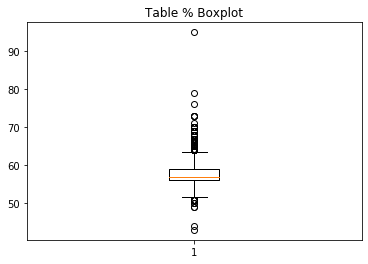

In [84]:
plt.boxplot(diamonds['table'])
plt.title('Table % Boxplot')

In [85]:
diamonds.table.describe()

count    53932.000000
mean        57.457029
std          2.234064
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [86]:
table_iqr = (np.quantile(diamonds['table'], .75)) - (np.quantile(diamonds['table'], .25))
table_lower_limit = ((np.quantile(diamonds['table'], .25)) - 1.5*table_iqr)
table_upper_limit = ((np.quantile(diamonds['table'], .75)) + 1.5*table_iqr)
print(table_iqr)
print(table_lower_limit)
print(table_upper_limit)

3.0
51.5
63.5


In [87]:
table_above_upper_limit = diamonds[diamonds.table > table_upper_limit].shape[0]
table_below_lower_limit = diamonds[diamonds.table < table_lower_limit].shape[0]
total_table_outliers = table_above_upper_limit + table_below_lower_limit
print(table_above_upper_limit)
print(table_below_lower_limit)
print(total_table_outliers)

588
16
604


In [88]:
#gives the percentage of rows that are outliers
table_upper_outliers_percent = (diamonds[diamonds.table > table_upper_limit].shape[0]) / (diamonds.shape[0])
print(table_upper_outliers_percent)
table_lower_outliers_percent = (diamonds[diamonds.table < table_lower_limit].shape[0]) / (diamonds.shape[0])
print(table_lower_outliers_percent)
total_table_outliers_percent = table_upper_outliers_percent + table_lower_outliers_percent
print(total_table_outliers_percent)







0.01090261811169621
0.0002966698805903731
0.011199287992286583


In [89]:
# D'Agostino and Pearson's Test
from scipy.stats import normaltest
stat, p = normaltest(diamonds['table'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=8027.522, p=0.000
Sample does not look Gaussian (reject H0)


In [90]:
#anderson-darling
from scipy.stats import anderson
result = anderson(diamonds['table'])
print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):

    sl, cv = result.significance_level[i], result.critical_values[i]

    if result.statistic < result.critical_values[i]:

        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv)) 
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 695.644
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


## Cut

In [91]:
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
color_order = ['J','I','H', 'G', 'F', 'E', 'D']

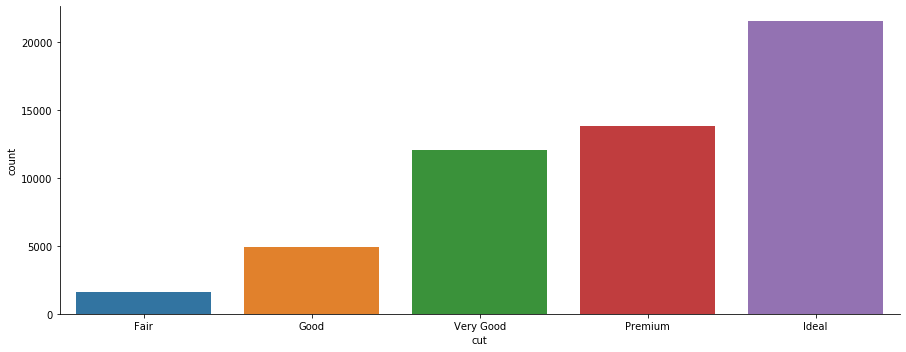

In [92]:
#Ideal, 'Premium', 'Good', 'Very Good', 'Fair'
sns.catplot(x='cut', data=diamonds , kind='count',aspect=2.5, order=cut_order)

In [93]:
data = diamonds.groupby('cut').sum()
data

,carat,depthper,table,price,length,width,depth
cut,,,,,,,
Fair,1683.14,103049.6,95009.6,7011219,10057.50,9954.07,6412.260
Good,4164.68,305838.8,287835.9,19270749,28645.08,28703.75,18875.725
Ideal,15144.21,1329775.5,1205704.4,74495733,118691.07,118956.62,73710.426
Premium,12297.50,844776.2,810049.4,63187778,82385.88,81985.82,54301.035
Very Good,9741.70,746825.1,700173.2,48102484,69359.09,69713.45,43009.520


In [94]:
#pie, ax = plt.subplots(figsize=[10,6])
#labels = data.keys()
#plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
#plt.title("Delivery Tips by type", fontsize=14);
#pie.savefig("DeliveryPieChart.png")

In [95]:
cut_tab = pd.crosstab(diamonds['cut'],columns='count')
cut_tab

col_0,count
cut,
Fair,1609
Good,4904
Ideal,21549
Premium,13789
Very Good,12081


In [96]:
cut_tab/cut_tab.sum()

col_0,count
cut,
Fair,0.029834
Good,0.090929
Ideal,0.399559
Premium,0.255674
Very Good,0.224004


In [97]:
diamonds.groupby("cut").median()

,carat,depthper,table,price,length,width,depth
cut,,,,,,,
Fair,1.00,65.0,58.0,3282,6.18,6.10,3.97
Good,0.82,63.4,58.0,3054,5.98,5.99,3.70
Ideal,0.54,61.8,56.0,1810,5.25,5.26,3.23
Premium,0.86,61.4,59.0,3183,6.11,6.06,3.72
Very Good,0.71,62.1,58.0,2647,5.74,5.77,3.56


## Clarity

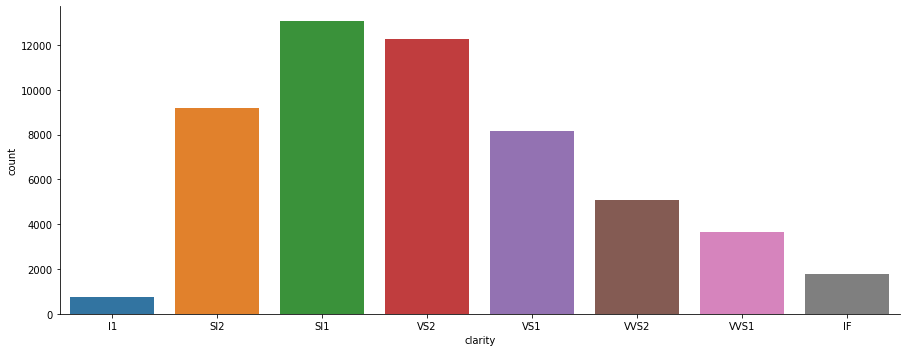

In [98]:
p = sns.catplot(x='clarity', data=diamonds, kind='count' ,aspect=2.5, order=clarity_order )

In [99]:
clarity_tab = pd.crosstab(diamonds['clarity'],columns='count')
clarity_tab

col_0,count
clarity,
I1,741
IF,1790
SI1,13065
SI2,9190
VS1,8170
VS2,12256
VVS1,3654
VVS2,5066


In [100]:
clarity_tab/clarity_tab.sum()

col_0,count
clarity,
I1,0.013740
IF,0.033190
SI1,0.242249
SI2,0.170400
VS1,0.151487
VS2,0.227249
VVS1,0.067752
VVS2,0.093933


In [101]:
diamonds.groupby("clarity").median()

,carat,depthper,table,price,length,width,depth
clarity,,,,,,,
I1,1.12,62.2,58.0,3344.0,6.65,6.61,4.110
IF,0.35,61.7,56.0,1080.0,4.57,4.59,2.805
SI1,0.76,62.0,57.0,2822.0,5.87,5.87,3.620
SI2,1.01,61.9,58.0,4072.0,6.42,6.41,3.970
VS1,0.57,61.8,57.0,2005.0,5.36,5.37,3.300
VS2,0.63,61.8,57.0,2053.0,5.51,5.51,3.380
VVS1,0.39,61.7,57.0,1092.5,4.70,4.71,2.900
VVS2,0.44,61.8,57.0,1311.0,4.90,4.90,3.010


## Color

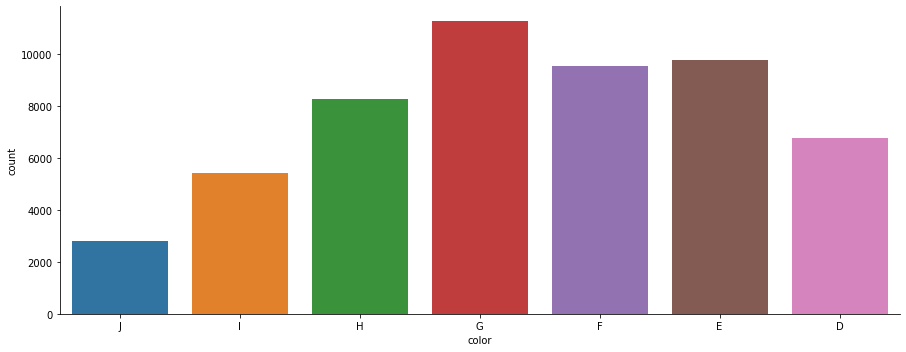

In [102]:
p = sns.catplot(x='color', data=diamonds, kind='count' ,aspect=2.5, order=color_order)

In [103]:
color_tab = pd.crosstab(diamonds['color'],columns='count')
color_tab

col_0,count
color,
D,6774
E,9797
F,9539
G,11290
H,8302
I,5422
J,2808


In [104]:
color_tab/color_tab.sum()

col_0,count
color,
D,0.125603
E,0.181655
F,0.176871
G,0.209338
H,0.153935
I,0.100534
J,0.052066


In [105]:
diamonds.groupby("color").median()

,carat,depthper,table,price,length,width,depth
color,,,,,,,
D,0.53,61.8,57.0,1836.5,5.23,5.24,3.22
E,0.53,61.8,57.0,1739.0,5.23,5.24,3.22
F,0.70,61.8,57.0,2344.0,5.65,5.65,3.48
G,0.70,61.8,57.0,2241.5,5.64,5.63,3.49
H,0.90,61.9,57.0,3455.5,6.14,6.14,3.82
I,1.00,61.9,57.0,3730.0,6.35,6.35,3.93
J,1.11,62.0,58.0,4234.0,6.64,6.63,4.11


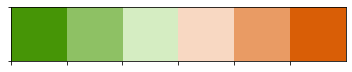

In [106]:
famu = sns.palplot(sns.diverging_palette(120,25, s=99, l=55))

## Bivariate

In [107]:
diamonds.corr()

,carat,depthper,table,price,length,width,depth
carat,1.000000,0.028221,0.181658,0.921610,0.977765,0.953989,0.127129
depthper,0.028221,1.000000,-0.295700,-0.010670,-0.025097,-0.029141,0.003195
table,0.181658,-0.295700,1.000000,0.127165,0.196130,0.184530,0.021334
price,0.921610,-0.010670,0.127165,1.000000,0.887227,0.867872,0.111714
length,0.977765,-0.025097,0.196130,0.887227,1.000000,0.974933,0.124839
width,0.953989,-0.029141,0.184530,0.867872,0.974933,1.000000,0.121670
depth,0.127129,0.003195,0.021334,0.111714,0.124839,0.121670,1.000000


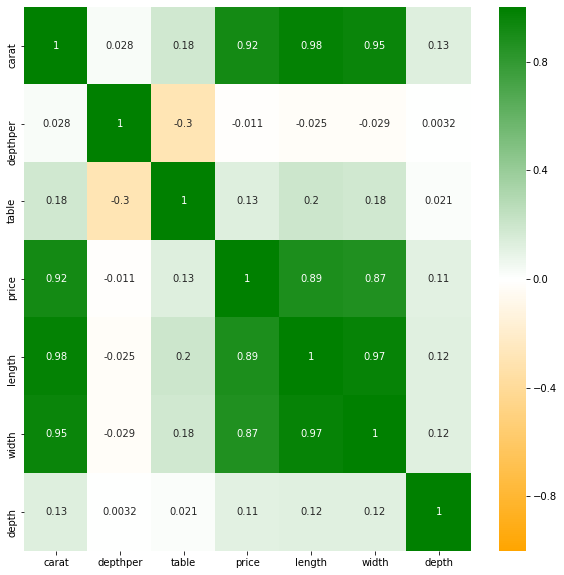

In [108]:
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(10,10))
cmap = LinearSegmentedColormap.from_list('RedGreenRed', ['orange', 'white','green'])
ax = sns.heatmap(diamonds.corr(), cmap=cmap, vmin=-1, vmax=1, annot=True)#, fmt="0.2f", linewidths=.5)



#sns.heatmap(diamonds.corr(), annot=True, palette='famu')

In [109]:
from statsmodels.graphics.gofplots import qqplot

In [110]:
#qqplot(diamonds, line='s')

In [111]:
from matplotlib.colors import LinearSegmentedColormap


### tryna set a baseline

In [112]:
from random import seed
from random import randrange

# zero rule algorithm for regression
def zero_rule_algorithm_regression(train, test):
	output_values = [row[-1] for row in train]
	prediction = sum(output_values) / float(len(output_values))
	predicted = [prediction for i in range(len(test))]
	return predicted

seed(1)
train = [[10], [15], [12], [15], [18], [20]]
test = [[None], [None], [None], [None]]
predictions = zero_rule_algorithm_regression(train, test)
print(predictions)

[15.0, 15.0, 15.0, 15.0]


## Random forest

In [113]:
#diamonds = pd.get_dummies(diamonds)
#diamonds.head()

In [114]:
#   https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
#labels are the vaules we want to predict
# Labels are the values we want to predict
#labels = np.array(diamonds['price'])
# Remove the labels from the features
# axis 1 refers to the columns
#diamonds = diamonds.drop('price', axis = 1)
# Saving feature names for later use
#feature_list = list(diamonds.columns)
# Convert to numpy array
#diamonds = np.array(diamonds)

In [115]:
# Using Skicit-learn to split data into training and testing sets
#from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
#train_features, test_features, train_labels, test_labels = train_test_split(diamonds, labels, test_size = 0.25, random_state = 614)

In [116]:
#print('Training Features Shape:', train_features.shape)
#print('Training Labels Shape:', train_labels.shape)
#print('Testing Features Shape:', test_features.shape)
#print('Testing Labels Shape:', test_labels.shape)

In [117]:
# The baseline predictions are the historical averages
#baseline_preds = test_features[:, feature_list.index('average')]
# Baseline errors, and display average baseline error
#baseline_errors = abs(baseline_preds - test_labels)
#print('Average baseline error: ', round(np.mean(baseline_errors), 2))

In [118]:
# Import the model we are using
#from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
#rf = RandomForestRegressor(n_estimators = 1000, random_state = 614)
# Train the model on training data
#rf.fit(train_features, train_labels);

In [119]:
# Use the forest's predict method on the test data
#predictions = rf.predict(test_features)
# Calculate the absolute errors
#errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')

In [120]:
# Calculate mean absolute percentage error (MAPE)
#mape = 100 * (errors / test_labels)
# Calculate and display accuracy
#accuracy = 100 - np.mean(mape)
#print('Accuracy:', round(accuracy, 2), '%.')

In [121]:
#this is with the dummies
#accuracy with 100 trees is 93.34% and the mean absolute error is $273.94
#500 trees 93.38% mae $272.48
#1000 trees 93.38 mae $272.29

In [122]:
# Import tools needed for visualization
#from sklearn.tree import export_graphviz
#import pydot
# Pull out one tree from the forest
#tree = rf.estimators_[5]
# Import tools needed for visualization
#from sklearn.tree import export_graphviz
#import pydot
# Pull out one tree from the forest
#tree = rf.estimators_[5]
# Export the image to a dot file
#export_graphviz(tree, out_file = 'tree.dot', feature_names = diamonds_list, rounded = True, precision = 1)
# Use dot file to create a graph
#(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
#graph.write_png('tree.png')

In [123]:
# Import tools needed for visualization
#from sklearn.tree import export_graphviz

In [124]:
#pip install pydot

In [125]:
# Limit depth of tree to 3 levels
#rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
#rf_small.fit(train_diamonds, train_labels)
# Extract the small tree
#tree_small = rf_small.estimators_[5]
# Save the tree as a png image
#export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = diamonds_list, rounded = True, precision = 1)
#(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
#graph.write_png('small_tree.png');

In [126]:
# Get numerical feature importances
#importances = list(rf.feature_importances_)
# List of tuples with variable and importance
#feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
#feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [127]:
# New random forest with only the two most important variables
#rf_most_important = RandomForestRegressor(n_estimators= 500, random_state=614)
# Extract the two most important features
#important_indices = [feature_list.index('carat'), feature_list.index('width')]
#train_important = train_features[:, important_indices]
#test_important = test_features[:, important_indices]
# Train the random forest
#rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
#predictions = rf_most_important.predict(test_important)
#errors = abs(predictions - test_labels)
# Display the performance metrics
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')
#mape = np.mean(100 * (errors / test_labels))
#accuracy = 100 - mape
#print('Accuracy:', round(accuracy, 2), '%.')

In [128]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

NameError: name 'importances' is not defined

In [ ]:
#i need to normalize the features.
#also need to do the eda on each feature. show the ranges and boxplots or histograms and whatnot

In [ ]:
p = diamonds.hist(figsize = (20,20), bins=50)

In [ ]:
p = sns.catplot(x='cut', y='price', data=diamonds, kind='box' ,aspect=2.5, order=cut_order )

In [ ]:
p = sns.catplot(x='color', y='price', data=diamonds, kind='box' ,aspect=2.5, order=color_order )

In [ ]:
p = sns.catplot(x='clarity', y='price', data=diamonds, kind='box' ,aspect=2.5, order=clarity_order )

## one hot encoding

In [129]:
#one hot encoding
ohe_dia =  pd.get_dummies(diamonds)
ohe_dia.head()

,carat,depthper,table,price,length,width,depth,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [130]:
cols = ohe_dia.columns
diamond_clean_data = pd.DataFrame(ohe_dia,columns= cols)
diamond_clean_data.head()

,carat,depthper,table,price,length,width,depth,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


# power transform

In [167]:
#from sklearn.preprocessing import PowerTransformer
#power = PowerTransformer(method='yeo-johnson', standardize=True)
#diapt = power.fit_transform(diamonds)

# scaling

In [131]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
numericals =  pd.DataFrame(sc_X.fit_transform(
              diamond_clean_data[['carat','depthper','length','width','depth','table']]),
              columns=['carat','depthper','length','width','depth','table'],index=diamond_clean_data.index)

In [132]:
numericals.head()

,carat,depthper,length,width,depth,table
0,-1.198105,-0.174057,-1.591562,-1.539248,-0.178039,-1.099813
1,-1.240300,-1.360792,-1.645149,-1.662019,-0.195696,1.585901
2,-1.198105,-3.385224,-1.502249,-1.460323,-0.195696,3.376376
3,-1.071517,0.454215,-1.368280,-1.320013,-0.148609,0.243044
4,-1.029322,1.082487,-1.243242,-1.214781,-0.130952,0.243044


In [133]:
diamond_clean_data_standard = diamond_clean_data.copy(deep=True)
diamond_clean_data_standard[['carat','depthper','length',
                             'width','depth','table']] = numericals[['carat','depthper','length','width','depth','table']]

In [134]:
diamond_clean_data_standard.head()

,carat,depthper,table,price,length,width,depth,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198105,-0.174057,-1.099813,326,-1.591562,-1.539248,-0.178039,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,-1.240300,-1.360792,1.585901,326,-1.645149,-1.662019,-0.195696,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-1.198105,-3.385224,3.376376,327,-1.502249,-1.460323,-0.195696,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,-1.071517,0.454215,0.243044,334,-1.368280,-1.320013,-0.148609,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,-1.029322,1.082487,0.243044,335,-1.243242,-1.214781,-0.130952,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [135]:
x = diamond_clean_data_standard.drop(["price"],axis=1)
y = diamond_clean_data_standard.price

In [136]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y,random_state = 614,test_size=0.25)

# linear regression

In [189]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)
y_pred = regr.predict(test_x)
print("Accuracy: "+ str(regr.score(test_x,test_y)*100) + "%")
print("Mean Absolute Error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean Squared Error: {}".format(mean_squared_error(test_y,y_pred)))
print("Intercept:", regr.intercept_)

Accuracy: 92.10188899060732%
Mean Absolute Error: 727.5461515300173
Mean Squared Error: 1252819.6439423368
Intercept: 3366.6275451054607


In [178]:
X = sm.add_constant(train_x)
lrmodel = sm.OLS(train_y, train_x).fit()
print(lrmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.015e+04
Date:                Fri, 19 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:43:45   Log-Likelihood:            -3.4176e+05
No. Observations:               40449   AIC:                         6.836e+05
Df Residuals:                   40425   BIC:                         6.838e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
carat          5493.1049     28.388    193.501

/Users/Frank/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


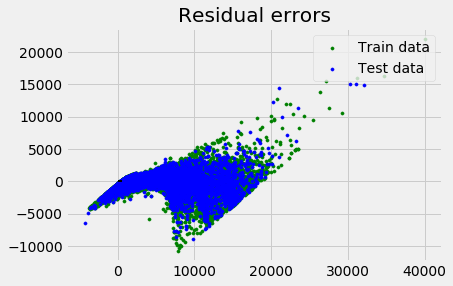

In [138]:
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(regr.predict(train_x), regr.predict(train_x) - train_y,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(regr.predict(test_x), regr.predict(test_x) - test_y,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 500, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

In [188]:
#from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score
#from sklearn import linear_model

#regr = linear_model.LinearRegression()
#regr.fit(train_x,train_y)
#y_pred = regr.predict(test_x)
#print("Accuracy: "+ str(regr.score(test_x,test_y)*100) + "%")
#print("Mean Absolute Error: {}".format(mean_absolute_error(test_y,y_pred)))
#print("Mean Squared Error: {}".format(mean_squared_error(test_y,y_pred)))
#print("Intercept:", regr.intercept_)


#R2 = r2_score(test_y,y_pred)
#print('R Squared: {}'.format(R2))
#n=test_x.shape[0]
#p=test_x.shape[1] - 1

#adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
#print('Adjusted R Squared: {}'.format(adj_rsquared))

#regressor = linear_model.LinearRegression()
#model = regressor.fit(train_x, train_y)
#print("Coef:", regr.coef_)
#print("Constant:", regr.intercept_)
#print("R2:", regr.score(train_x, train_y))

In [180]:
#dia_coef = pd.DataFrame(regr.coef_, x.columns, columns=['Coefficients'])
#print(dia_coef)
#print("Intercept: {}".format(regr.intercept_))

In [182]:
#regr.score(x,y)

In [181]:
#X = np.column_stack((data['TV'], data['radio'], data['newspaper']))
#y = data['sales']
#import statsmodels.api as sm
#X2 = sm.add_constant(x)
#est = sm.OLS(y, X2)
#est2 = est.fit()
#print(est2.summary())

In [ ]:
#p=sns.pairplot(diamonds)

In [ ]:
#diamond_clean_data.head(5)

## robust scaler

In [190]:
#from sklearn.preprocessing import RobustScaler
#robust = RobustScaler(quantile_range = (0.25,0.75))
#robust.fit_transform(X.f3.values.reshape(-1, 1))


In [152]:
#robust_numericals =  pd.DataFrame(robust.fit_transform(
              #diamond_clean_data[['carat','depthper','length','width','depth','table']]),
              #columns=['carat','depthper','length','width','depth','table'],index=diamond_clean_data.index)

In [ ]:
#diamond_clean_data_robust = diamond_clean_data.copy(deep=True)

In [ ]:
#diamond_clean_data_robust[['carat','depthper','length',
                             #'width','depth','table']] = robust_numericals[['carat','depthper','length','width','depth','table']]

In [ ]:
#diamond_clean_data_robust.head(15)

In [ ]:
#xx = diamond_clean_data_robust.drop(["price"],axis=1)
#yy = diamond_clean_data_robust.price

In [ ]:
#from sklearn.model_selection import train_test_split
#train_xx, test_xx, train_yy, test_yy = train_test_split(xx, yy,random_state = 614,test_size=0.2)

In [ ]:
#from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score
#from sklearn import linear_model

#regr = linear_model.LinearRegression()
#regr.fit(train_xx,train_yy)
#yy_pred = regr.predict(test_xx)
#print("Accuracy: "+ str(regr.score(test_xx,test_yy)*100) + "%")
#print("Mean Absolute Error: {}".format(mean_absolute_error(test_yy,yy_pred)))
#print("Mean Squared Error: {}".format(mean_squared_error(test_yy,yy_pred)))
#R22 = r2_score(test_yy,yy_pred)
#print('R Squared: {}'.format(R2))
#nn=test_xx.shape[0]
#pp=test_xx.shape[1] - 1

#adj_rsquared2 = 1 - (1 - R22) * ((nn - 1)/(nn-pp-1))
#print('Adjusted R Squared: {}'.format(adj_rsquared))

In [ ]:
#train_x

# Random Forest

In [143]:
from sklearn.ensemble import RandomForestRegressor

RFReg = RandomForestRegressor(n_estimators = 500, random_state = 614)

RFReg.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=614, verbose=0,
                      warm_start=False)

In [144]:
y_predict_rfr = RFReg.predict((test_x))

from sklearn import metrics
rfrr_square = metrics.r2_score(test_y, y_predict_rfr)
n = train_x.shape[0]
p = train_x.shape[1]
rfradjr_square = 1-(1-rfrr_square)*(n-1)/(n-p-1)
print('R-Square Error associated with Random Forest Regression is:', rfrr_square)
print('Adjusted R-Square Error associated with Random Forest Regression is:', rfradjr_square)

R-Square Error associated with Random Forest Regression is: 0.9805618582576324
Adjusted R-Square Error associated with Random Forest Regression is: 0.9805493553709543


In [145]:
#10 trees
#R-Square Error associated with Random Forest Regression is: 0.978387175234247
#Adjusted R-Square Error associated with Random Forest Regression is: 0.9783732735608041
#Mean Absolute Error: 288.98 dollars.
#Accuracy: 92.96 %.

#50 trees
#R-Square Error associated with Random Forest Regression is: 0.9801381319584918
#Adjusted R-Square Error associated with Random Forest Regression is: 0.9801253565250871
#Mean Absolute Error: 275.29 dollars.
#Accuracy: 93.31 %.

#100 trees
#R-Square Error associated with Random Forest Regression is: 0.9803057648163251
#Adjusted R-Square Error associated with Random Forest Regression is: 0.980293097206737
#Mean Absolute Error: 274.07 dollars.
#Accuracy: 93.34 %.

#250 trees
#R-Square Error associated with Random Forest Regression is: 0.9805293898806033
#Adjusted R-Square Error associated with Random Forest Regression is: 0.9805168661098076
#Mean Absolute Error: 272.77 dollars.
#Accuracy: 93.38 %.

#500 trees
#R-Square Error associated with Random Forest Regression is: 0.9805618582576324
#Adjusted R-Square Error associated with Random Forest Regression is: 0.9805493553709543
#Mean Absolute Error: 272.56 dollars.
#Accuracy: 93.39 %.

In [146]:
#x_val = np.arange(min(train_x), max(train_x), 0.01)

#x_val = x_val.reshape((len(x_val),1))

#plt.scatter(train_x, train_y, color = 'orange')

#plt.plot(x_val, RFReg.predict(x_val), color = 'green')

#plt.show()

In [147]:
y_pred = RFReg.predict(test_x)

In [148]:
df=pd.DataFrame({'Actual':test_y, 'Predicted':y_pred})
df

,Actual,Predicted
48941,2045,2542.8220
9573,4626,4318.0200
41426,1227,1153.7060
37351,982,898.7440
24356,12620,10388.4280
...,...,...
28906,684,677.0340
22968,11019,10805.3500
8282,4382,4713.8980
5447,3830,4913.8064


In [149]:
# Calculate the absolute errors
errors = abs(y_pred - test_y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_y)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Mean Absolute Percentage Error:', round((np.mean(mape)), 2), '%.')
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 272.56 dollars.
Mean Absolute Percentage Error: 6.61 %.
Accuracy: 93.39 %.


In [150]:
np.mean(mape)

6.614719699775631